In [ ]:
#y = coef_1 * x1 + coef_2 * x2 + ... + intercept_

In [28]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
ds = pd.read_csv("data.csv")

In [19]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [20]:
ds["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [21]:
#Transforming State Column
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
encoded_data = ohe.fit_transform(ds[['State']])
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(['State']))
ds = pd.concat([ds, encoded_df], axis=1)
ds = ds.drop(columns=['State'])

C:\Users\Abhijit\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
#Lets divide into independant(X) and dependant(y)
X = ds[["R&D Spend", "Administration", "Marketing Spend", "State_California", "State_Florida", "State_New York"]]
y = ds[["Profit"]]

In [31]:
# #Plot individual columns against y
# for col in X.columns:
#     plt.scatter(X[col], y)
#     plt.xlabel(col)
#     plt.ylabel('Dependent Variable')
#     plt.title(f'Relationship between {col} and Dependent Variable')
#     plt.show()

In [32]:
#Divide into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [34]:
#Lets train model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [35]:
reg.coef_

array([[ 7.78395354e-01,  5.70695437e-03,  3.21344322e-02,
         1.24850276e+02, -1.02835632e+03,  9.03506043e+02]])

In [36]:
reg.intercept_

array([46250.73722073])

In [37]:
result = reg.predict(X_test)
result

array([[101475.55240111],
       [133287.417583  ],
       [132546.1614474 ],
       [ 72702.7136192 ],
       [178346.51727008]])

In [39]:
X_test

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
28,66051.52,182645.56,118148.20,0.0,1.0,0.0
11,100671.96,91790.61,249744.55,1.0,0.0,0.0
10,101913.08,110594.11,229160.95,0.0,1.0,0.0
41,27892.92,84710.77,164470.71,0.0,1.0,0.0
2,153441.51,101145.55,407934.54,0.0,1.0,0.0


In [42]:
myinput = [[100000, 100000, 100000, 0, 0, 1]]
X.columns
mydf = pd.DataFrame(columns = X.columns, data = myinput)
mydf

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,100000,100000,100000,0,0,1


In [43]:
result = reg.predict(mydf)
result

array([[128777.91733386]])

In [44]:
predictions = reg.predict(X)

In [46]:
residuals = y - predictions

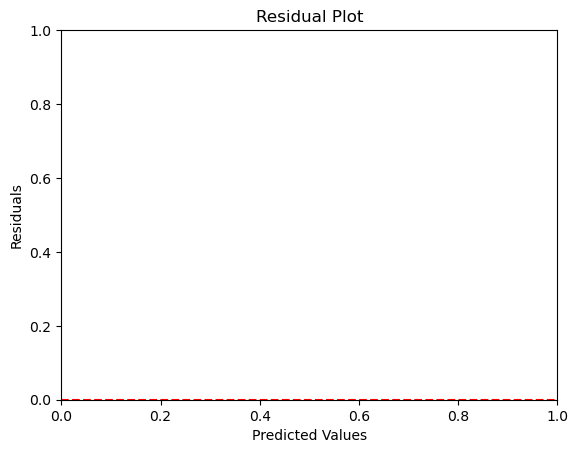

In [48]:
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()